<h3>Import Libraries. </h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h2>1. Load dataset </h2>

In [3]:
df=pd.read_csv(r"D:\Ashish Workshop\All data\Project001\Fraud_Transactions.csv")
df.head()
df.shape


(500, 9)

<h2>2. Data Cleaning and  Basic checks.</h2>

In [4]:
print(df['transaction_time'].dtype)
if df['transaction_time'].dtype==object:
    df['transaction_time']=pd.to_datetime(df['transaction_time'])
    
print("Datatype of each colums .",df.dtypes)
print("Checks null values .",df.isnull().sum())
print("Checks Duplicated records .",df.duplicated().sum())


object
Datatype of each colums . transaction_id               int64
customer_id                  int64
amount                     float64
transaction_time    datetime64[ns]
transaction_type            object
location                    object
device_type                 object
is_international            object
is_fraud                     int64
dtype: object
Checks null values . transaction_id      0
customer_id         0
amount              0
transaction_time    0
transaction_type    0
location            0
device_type         0
is_international    0
is_fraud            0
dtype: int64
Checks Duplicated records . 0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19868\3579791286.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['transaction_time']=pd.to_datetime(df['transaction_time'])


<h2>3. Create feature and falgs used for modeling.</h2>

In [5]:
df['hour'] = df['transaction_time'].dt.hour
df['day_of_week'] = df['transaction_time'].dt.day_name()

df['high_amount_flag'] = (df['amount'] > 50000).astype(int)
df['international_flag'] = (df['is_international'] == 'Yes').astype(int)

# Show new columns
df[['transaction_id','amount','transaction_time','hour','day_of_week','high_amount_flag','international_flag']].head()
df.head()

,transaction_id,customer_id,amount,transaction_time,transaction_type,location,device_type,is_international,is_fraud,hour,day_of_week,high_amount_flag,international_flag
0,1,1051,24848.33,2024-07-26 07:12:00,Payment,Pune,Mobile,No,0,7,Friday,0,0
1,2,1092,35661.67,2024-05-19 23:39:00,Payment,Hyderabad,Mobile,No,0,23,Sunday,0,0
2,3,1014,75808.83,2024-12-16 07:51:00,Transfer,Delhi,Mobile,No,0,7,Monday,1,0
3,4,1071,1537.91,2024-08-16 22:30:00,Payment,Hyderabad,Web,No,0,22,Friday,0,0
4,5,1060,11695.66,2024-06-01 01:27:00,Payment,Chennai,ATM,Yes,0,1,Saturday,0,1


<h2>4. Complete Deep Fraud Analysis in Python.</h2>

In [6]:
fraud_rate = df['is_fraud'].mean() * 100
print("Fraud Rate (%):", fraud_rate)

fraud_by_hour = df.groupby('hour')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_hour

fraud_by_day = df.groupby('day_of_week')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_day

fraud_by_type = df.groupby('transaction_type')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_type

fraud_by_location = df.groupby('location')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_location

high_amount_fraud_rate = df[df['high_amount_flag'] == 1]['is_fraud'].mean()
high_amount_fraud_rate

international_fraud_rate = df[df['international_flag'] == 1]['is_fraud'].mean()
international_fraud_rate

df.groupby('is_fraud')['amount'].describe()

df

Fraud Rate (%): 29.4


,transaction_id,customer_id,amount,transaction_time,transaction_type,location,device_type,is_international,is_fraud,hour,day_of_week,high_amount_flag,international_flag
0,1,1051,24848.33,2024-07-26 07:12:00,Payment,Pune,Mobile,No,0,7,Friday,0,0
1,2,1092,35661.67,2024-05-19 23:39:00,Payment,Hyderabad,Mobile,No,0,23,Sunday,0,0
2,3,1014,75808.83,2024-12-16 07:51:00,Transfer,Delhi,Mobile,No,0,7,Monday,1,0
3,4,1071,1537.91,2024-08-16 22:30:00,Payment,Hyderabad,Web,No,0,22,Friday,0,0
4,5,1060,11695.66,2024-06-01 01:27:00,Payment,Chennai,ATM,Yes,0,1,Saturday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,1062,53785.82,2024-04-19 13:55:00,Transfer,Bangalore,Mobile,No,0,13,Friday,1,0
496,497,1068,91993.58,2024-10-16 05:35:00,ATM,Bangalore,Web,No,1,5,Wednesday,1,0
497,498,1021,34699.96,2024-05-25 09:33:00,Transfer,Mumbai,ATM,No,0,9,Saturday,0,0
498,499,1092,34760.62,2024-05-16 21:33:00,Online,Hyderabad,Mobile,Yes,1,21,Thursday,0,1


<h2>5. EDA by using Matplotlib.</h2>

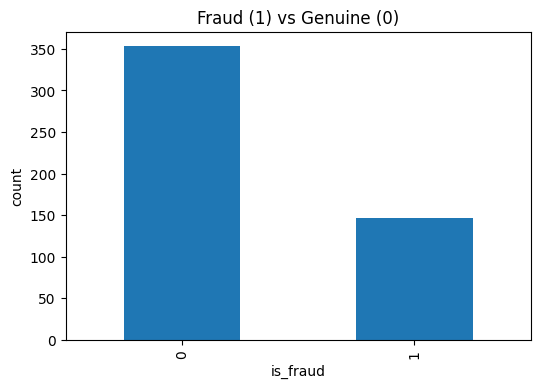


Fraud rate by transaction_type:
 transaction_type
Payment     0.335766
ATM         0.318966
Transfer    0.286822
Online      0.228814
Name: is_fraud, dtype: float64


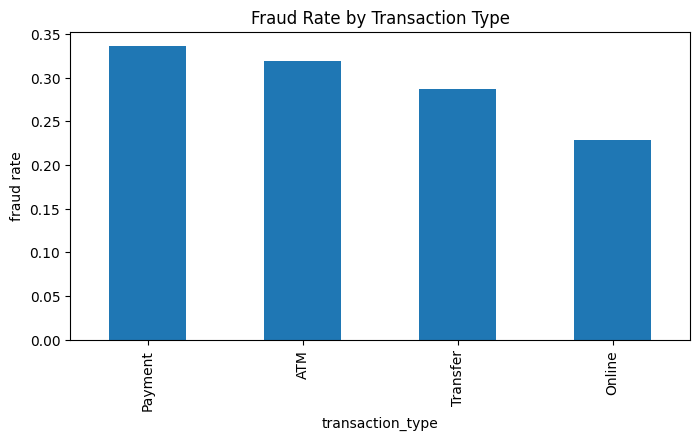


Fraud rate by hour (0-23):
 hour
0     0.210526
1     0.600000
2     0.566667
3     0.555556
4     0.666667
5     0.045455
6     0.222222
7     0.250000
8     0.086957
9     0.266667
10    0.227273
11    0.222222
12    0.142857
13    0.210526
14    0.190476
15    0.157895
16    0.190476
17    0.411765
18    0.142857
19    0.250000
20    0.391304
21    0.238095
22    0.363636
23    0.214286
Name: is_fraud, dtype: float64


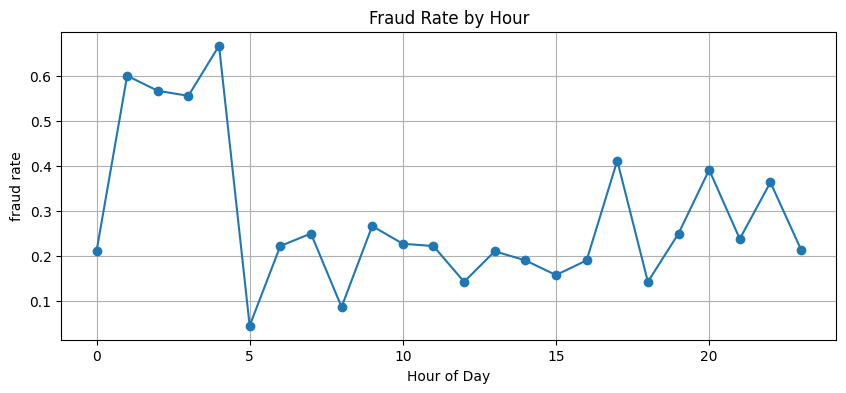

In [7]:
plt.figure(figsize=(6,4))
df['is_fraud'].value_counts().plot(kind='bar')
plt.title('Fraud (1) vs Genuine (0)')
plt.xlabel('is_fraud')
plt.ylabel('count')
plt.show()

pt = df.groupby('transaction_type')['is_fraud'].mean().sort_values(ascending=False)
print('\nFraud rate by transaction_type:\n', pt)
plt.figure(figsize=(8,4))
pt.plot(kind='bar')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('fraud rate')
plt.show()


hourly = df.groupby('hour')['is_fraud'].mean()
print('\nFraud rate by hour (0-23):\n', hourly)
plt.figure(figsize=(10,4))
hourly.plot(kind='line', marker='o')
plt.title('Fraud Rate by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('fraud rate')
plt.grid(True)
plt.show()

<h2>6. Get back the cleaned csv file for SQL Queries and Dashboard.</h2>

In [19]:
df.to_csv(r"D:\Ashish Workshop\All data\Project001\cleaned_fraud_data.csv", index=False)
# df